I will show some more visualizations with the results data. 

In [120]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter 

In [121]:
df = pd.read_csv("../all_results.csv")
df.head(1)

,J,R,E,M,E_Num,algo,n_subtypes,mallows_temperature,kendalls_w,runtime,kendalls_tau,subtype_acc,mean_stage_healthy,runtime_cross_validation,absolute_error_n_subtypes,relative_error,correct_bool
0,300,0.25,Exp 10: xi (Normal) & Continuous kj (Skewed) &...,0,10,BebmS,4,0.349626,0.576049,1.263543,0.454545,0.666218,0.243243,NaN,NaN,100,100


In [122]:
df = df[df['E_Num'] != 12]
bebms_alone = df[df['algo'] == 'BebmS']
bebms_alone.head(1)

,J,R,E,M,E_Num,algo,n_subtypes,mallows_temperature,kendalls_w,runtime,kendalls_tau,subtype_acc,mean_stage_healthy,runtime_cross_validation,absolute_error_n_subtypes,relative_error,correct_bool
0,300,0.25,Exp 10: xi (Normal) & Continuous kj (Skewed) &...,0,10,BebmS,4,0.349626,0.576049,1.263543,0.454545,0.666218,0.243243,NaN,NaN,100,100


In [123]:
bebms_alone.E_Num.unique()

array([10, 11,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [124]:
bebms_alone.shape

(1318, 17)

In [125]:
data_counter = Counter(bebms_alone['n_subtypes'])
data_counter

Counter({5: 277, 3: 273, 2: 266, 4: 252, 1: 250})

Kendall's W:

In [126]:
multi_subtype = bebms_alone[bebms_alone['n_subtypes'] > 1]
multi_subtype.head(1)

,J,R,E,M,E_Num,algo,n_subtypes,mallows_temperature,kendalls_w,runtime,kendalls_tau,subtype_acc,mean_stage_healthy,runtime_cross_validation,absolute_error_n_subtypes,relative_error,correct_bool
0,300,0.25,Exp 10: xi (Normal) & Continuous kj (Skewed) &...,0,10,BebmS,4,0.349626,0.576049,1.263543,0.454545,0.666218,0.243243,NaN,NaN,100,100


In [127]:
multi_subtype.shape

(1068, 17)

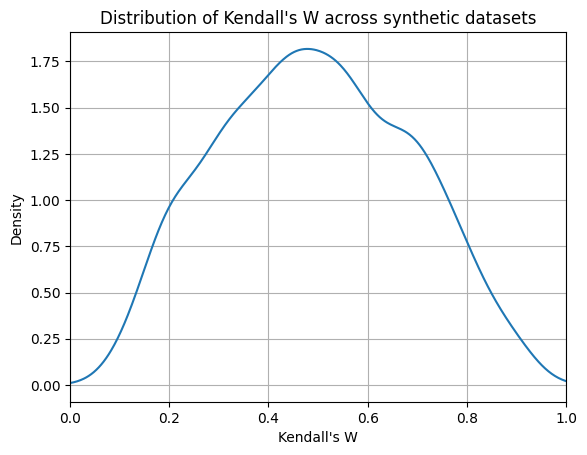

In [128]:
fig, ax = plt.subplots()
multi_subtype["kendalls_w"].plot(kind="density", ax=ax)
ax.set_xlabel("Kendall's W")
ax.set_ylabel("Density")
ax.set_xlim(0,1)  
plt.title("Distribution of Kendall's W across synthetic datasets")
plt.grid(True)
plt.savefig(f"kendalls_w.pdf", bbox_inches="tight", dpi=300)
plt.savefig(f"kendalls_w.png", bbox_inches="tight", dpi=300)
plt.show()

In [129]:
exp1 = df[(df['E_Num'] == 1) & (df['algo'] != 'Random Guessing')]
exp1.head(1)

,J,R,E,M,E_Num,algo,n_subtypes,mallows_temperature,kendalls_w,runtime,kendalls_tau,subtype_acc,mean_stage_healthy,runtime_cross_validation,absolute_error_n_subtypes,relative_error,correct_bool
100,300,0.25,Exp 1: S & Ordinal kj (DM) & X (Normal),0,1,BebmS,1,0.264856,1.0,1.010762,0.0,1.0,0.04,1595.9829,0.0,0,1


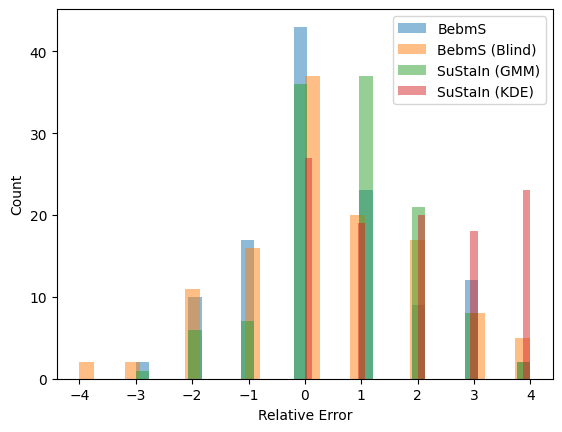

In [130]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for name, group in exp1.groupby("algo"):
    ax.hist(group["relative_error"], bins=30, alpha=0.5, label=name)

ax.set_xlabel("Relative Error")
ax.set_ylabel("Count")
ax.legend()
plt.show()


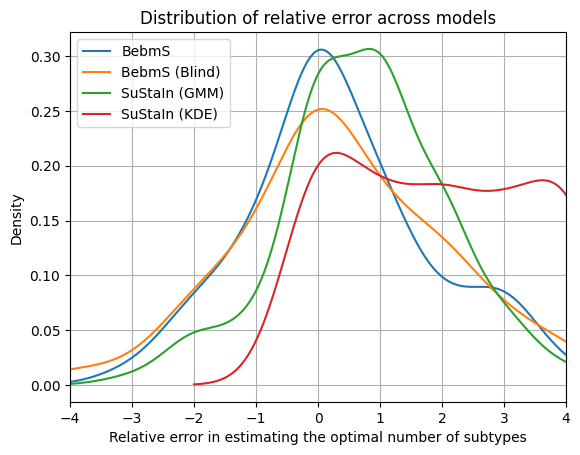

In [131]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for name, group in exp1.groupby("algo"):
    group["relative_error"].plot(kind="density", ax=ax, label=name)

ax.set_xlabel("Relative error in estimating the optimal number of subtypes")
ax.set_xlim(-4, 4)      # <-- fix the x-axis range
ax.legend()
plt.title("Distribution of relative error across models")
plt.grid(True)
plt.savefig(f"relative_error.pdf", bbox_inches="tight", dpi=300)
plt.savefig(f"relative_error.png", bbox_inches="tight", dpi=300)
plt.show()
